 # Biodiversity in U.S. National Parks

__Project Overview:__  
For this project, you will interpret data from the National Parks Service about endangered species in different parks.  
You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.  
During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.  
After you perform your analysis, you will share your findings about the National Park Service.

__Project Objectives:__  
- Complete a project to add to your portfolio
- Use Jupyter Notebook to communicate findings
- Run an analysis on a set of data
- Become familiar with data analysis workflow

__Prerequisites:__  
- Data Visualization
- Communicating Data Science Findings

__Data files:__  
- observations.csv: This file contains data on .
- species_info.csv: This file contains data on .

__Debugging Tips: Feeling stuck? Try the following:__  
Google your question: oftentimes, someone has had the same question as you! Check out websites like StackOverflow (https://stackoverflow.com/) and Dev.to (https://dev.to/) to see how other folks have found solutions.  
Read the documentation: make sure to carefully read through the documentation for any languages and libraries that you are using. Oftentimes they’ll have examples of what you’re looking for!  
Rubber ducking: try to explain a problem to a friend or co-worker. Oftentimes you’ll figure out the solution as you’re trying to explain it. And if not, getting another pair of eyes on your code can be helpful.  

__Check out these helpful resources:__  
- Matplotlib user guide (https://matplotlib.org/stable/users/index.html)
- seaborn visualisation examples (https://seaborn.pydata.org/examples/index.html)
- numPy user guide (https://numpy.org/doc/stable/user/index.html)
- pandas user guide (https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- SciPy user guide (https://docs.scipy.org/doc/scipy/tutorial/index.html)

__Example Code:__  
What to see an example of how someone else has completed this project?   
Check out the file _biodiversity_solution.ipynb_   
Remember: your project doesn’t have to look anything like this! It should be unique to your vision.

## 1/ Loading libraries and data
Prerequsite for project scoping purpose

In [160]:
# Install new libraries
#!pip install wordcloud

In [109]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import sem
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # Disable column wrapping when using the "display" command

In [4]:
# Load observations data
obs = pd.read_csv('observations.csv', encoding='utf-8')
print("Dimensions of obs dataframe: ", obs.shape) # (23296, 3)
display(obs)
print("Columns of obs dataframe: \n", obs.columns)
#print(obs.head())
#print(obs.info)
print("Summary statistics of obs dataframe:")
print(obs.describe())
print("Variable types of obs dataframe:")
print(obs.dtypes)
print("Missing values of obs dataframe:")
print(obs.isna().value_counts())

Dimensions of obs dataframe:  (23296, 3)


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


Columns of obs dataframe: 
 Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Summary statistics of obs dataframe:
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
Variable types of obs dataframe:
scientific_name    object
park_name          object
observations        int64
dtype: object
Missing values of obs dataframe:
scientific_name  park_name  observations
False            False      False           23296
Name: count, dtype: int64


In [6]:
# Load species data
sp = pd.read_csv('species_info.csv', encoding='utf-8')
print("Dimensions of sp dataframe: ", sp.shape) # (5824, 4)
display(sp)
print("Columns of sp dataframe: \n", obs.columns)
print(sp.columns)
#print(sp.head())
#print(sp.info)
print("Summary statistics of sp dataframe:")
print(sp.describe())
print("Variable types of sp dataframe:")
print(sp.dtypes)
print("Missing values of sp dataframe:")
print(sp.isna().value_counts())
print(sp.conservation_status.unique())
print(sp.category.unique())

Dimensions of sp dataframe:  (5824, 4)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


Columns of sp dataframe: 
 Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Summary statistics of sp dataframe:
              category    scientific_name        common_names conservation_status
count             5824               5824                5824                 191
unique               7               5541                5504                   4
top     Vascular Plant  Castor canadensis  Brachythecium Moss  Species of Concern
freq              4470                  3                   7                 161
Variable types of sp dataframe:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
Missing values of sp dataframe:
category  scientific_name  common_names  conservation_status
False     False            False         True                   5633
                                 

## 2/ Project Scoping
__Aim:__  
Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin.   
You should start with stating the goals for your project, then gathering the data, and considering the analytical steps required.   
A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope.  

__Prerequesite step:__  
In order to scope the project, I had to not only load the data and look at it raw, but also print some descriptive statistics using the .describe() method to find out what type of variables the dataset contains and if missing values are present using the .info() method.  
I also printed the column names using the .columns function as well as listed the various countries using the .unique() method for reporting purposes.  

__The Data:__  

_Observations:_  
The file 'observations.csv' contains 23296 rows and 3 columns without missing value.  
The variables are:  
- 'scientific_name': categorical (nominal) variable listing species using Latin names.
- 'park_name': categorical (nominal) variable listing US National Parks. 
- 'observations':  numerical (integer) variable (range 9-321), reflects the number of individuals observed per species.

_Species:_  
The file 'species_info.csv' contains 5824 rows and 4 columns with lots of missing values in one of the variable ('conservation_status').  
The variables are:  
- 'category': categorical (nominal) variable listing species taxonomical group, which can be 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', or 'Nonvascular Plant'  
- 'scientific_name': categorical (nominal) variable listing species using Latin names. Identical to 'scientific_name' in 'observations.csv', could be use to merge both datasets
- 'common_names': categorical (nominal) variable listing common names of species observed. Single name are expected yet some entries list multiple names (e.g. 'Aurochs, Aurochs, Domestic Cattle (Feral), Dom...'). 
- 'conservation_status': categorical (ordinal) variable listing species conservation status, which can be 'In Recovery'>'Species of Concern'>'Endangered'>'Threatened'. Includes 5633 NaNs. Could be converted to increasing numbers for stats and visualisation purpose

__Data cleaning:__  
first, both datasets should be joined for statistical and data visualisation purpose.   
a pre-requisite will be to check for duplicates and missing values.  
the multiple common names needs to be looked into as such long entries could be typo-prone.  
a critical step will be to handle the missing values in 'conservation_status'.  
create a numerical variable based on 'conservation_status' as follows:  
- 0 : no threat
- 1 : In Recovery
- 2 : Species of Concern
- 3 : Endangered
- 4 : Threatened   
 
__The Analysis:__  
Some interesting questions would be:  
- which parks maintain biodiversity?
- is there a link between conservation status and taxonomical categories?
- can we infer conservation status from observations? probably, if so can we use this to fill in missing values?
- stats on number of species (in total, per park)
- stats on number of categories (in total, per park), number of species/category.
- is there a bias (some species or park whose data are less captured)?  
- which endangered species need to be protected in which park?   
 

## 3/ Data Manipulation and Cleaning  
### 3.1/ Checking and removing  duplicates   
I'm checking if obs and sp contain duplicates.

In [8]:
# checking for duplicates in obs and sp whole dataframes
print("Duplicates of obs dataframe:")
print(obs.duplicated().value_counts()) # 15 duplicates 
print("Duplicates of sp dataframe:")
print(sp.duplicated().value_counts()) # no duplicate 

# dropping obs duplicates
obs = obs.drop_duplicates()
print("Dimensions of obs dataframe without duplicates: ", obs.shape) # (23281, 3)
#display(obs)

# Check for duplicates in scientific_name in sp dataframe
print(sp['scientific_name'].duplicated().sum())   # 283 duplicated scientific names. Why?

# Group sp dataframe by 'scientific_name' and filter groups with more than one row for a clearer view
sp_dup = sp.groupby('scientific_name').filter(lambda x: len(x) > 1).sort_values(by='scientific_name')
print("\nDuplicated scientific_name in sp dataframe:")
display(sp_dup) # scientific names are duplicated when they have more than one common name. I'll keep the 1st common name entry.

# Remove duplicated scientific names from sp dataframe
sp = sp.drop_duplicates(subset='scientific_name', keep='first')
print("Dimensions of sp dataframe without duplicates: ", sp.shape) # (5541, 4)
display(sp)

Duplicates of obs dataframe:
False    23281
True        15
Name: count, dtype: int64
Duplicates of sp dataframe:
False    5824
Name: count, dtype: int64
Dimensions of obs dataframe without duplicates:  (23281, 3)
283

Duplicated scientific_name in sp dataframe:


,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",NaN
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,NaN
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",NaN
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,NaN
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",NaN
3347,Vascular Plant,Zizia aptera,"Heartleaf Alexanders, Heart-Leaf Alexanders, M...",NaN


Dimensions of sp dataframe without duplicates:  (5541, 4)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


### 3.2/ Merging obs and sp datasets   
I'll merge both datasets using 'scientific_name' variable which has no missing value and no duplicates in sp now.

In [10]:
# the 'scientific_name' variable is common across both df
obsp = pd.merge(obs, sp, on="scientific_name", how='left')
print('Dimensions of obsp dataframe: ', obsp.shape) # (23281, 6) 
#print(obsp.head())
display(obsp)

Dimensions of obsp dataframe:  (23281, 6)


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
...,...,...,...,...,...,...
23276,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,NaN
23277,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,NaN
23278,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,NaN
23279,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,NaN


### 3.2/ Type of NaN in 'conservation_status'  
Most of the 'conservation_status' variable features missing values (880/24752=97%).  
I need to replace them with a meaningful descriptor.
In order to do this, I need to assess the type of missing values (Structurally missing, MAR, MCAR, MNAR, etc...).
If they are structural, they will be linked with one other variable: "park_name", "category", or "scientific_names".

conservation_status
True     22521
False      760
Name: count, dtype: int64
Percentage of missing values in 'conservation_status': 96.74%
conservation_status                  False  True 
park_name                                        
Bryce National Park                    190   5633
Great Smoky Mountains National Park    190   5628
Yellowstone National Park              190   5629
Yosemite National Park                 190   5631
Chi-square test for 'park_name': p-value = 0.9999997896887666


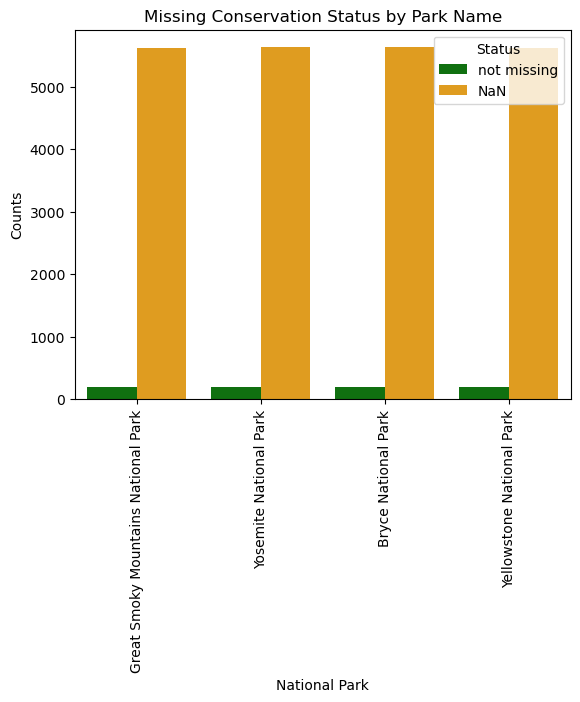

conservation_status  False  True 
category                         
Amphibian               28    292
Bird                   316   1767
Fish                    40    468
Mammal                 152    703
Nonvascular Plant       20   1312
Reptile                 20    296
Vascular Plant         184  17683
Chi-square test for 'category': p-value = 0.0


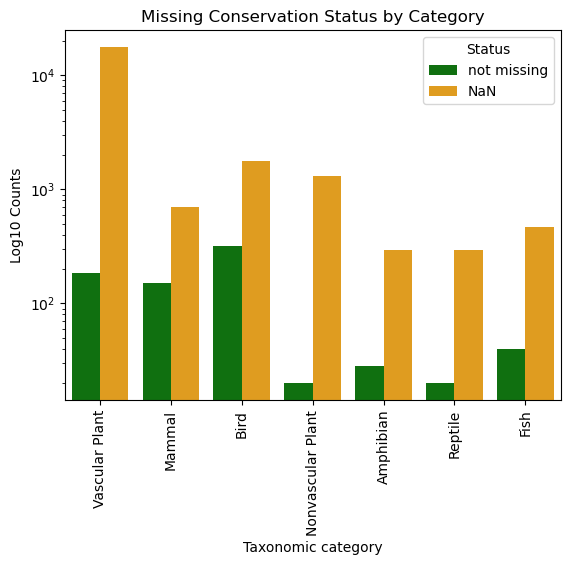

conservation_status                  False  True 
scientific_name                                  
Abies bifolia                            0      4
Abies concolor                           0      4
Abies fraseri                            4      0
Abietinella abietina                     0      4
Abronia ammophila                        4      0
...                                    ...    ...
Zonotrichia leucophrys gambelii          0      4
Zonotrichia leucophrys oriantha          0      4
Zonotrichia querula                      0      4
Zygodon viridissimus                     0      4
Zygodon viridissimus var. rupestris      0      4

[5541 rows x 2 columns]


In [173]:
# Check the overall percentage of missing values in 'conservation_status'
print(obsp['conservation_status'].isna().value_counts()) # 22521 NaNs
missing_percentage = obsp['conservation_status'].isna().mean() * 100
print(f"Percentage of missing values in 'conservation_status': {missing_percentage:.2f}%") # 96.74%

# Create a new column to represent missing conservation status
obsp['missing_conservation_status'] = obsp['conservation_status'].isna()

## park name
# Cross-tabulation of 'park_name' and missing values in 'conservation_status'
park_name_ct = pd.crosstab(obsp['park_name'], obsp['conservation_status'].isna())
print(park_name_ct) # similar proportions across national parks. No bias here.

# Chi-square test for 'park_name'
park_name_ct = pd.crosstab(obsp['park_name'], obsp['conservation_status'].isna())
chi2, p, dof, ex = chi2_contingency(park_name_ct)
print(f"Chi-square test for 'park_name': p-value = {p}") # p-value = 0.9999997896887666. Park name is not significant
# p-value > 0.05 indicates that missing values are not associated with US National Park and are missing at random

# Plot missing values by 'park_name'
sns.countplot(x='park_name', hue='missing_conservation_status', data=obsp, palette=['green','orange'])
plt.title('Missing Conservation Status by Park Name')
ax1 = plt.subplot()
plt.xlabel('National Park')
plt.ylabel('Counts')
plt.legend(title='Status', loc='upper right', labels=['not missing', 'NaN'])
ax1.tick_params(axis='x', labelrotation=90)
plt.savefig('Missing Conservation Status by Park Name.png', dpi=300, bbox_inches='tight')
plt.show()

## category
# Cross-tabulation of 'category' and missing values in 'conservation_status'
category_ct = pd.crosstab(obsp['category'], obsp['conservation_status'].isna())
print(category_ct) # similar proportions across categories. No bias here.

# Chi-square test for 'category'
category_ct = pd.crosstab(obsp['category'], obsp['conservation_status'].isna())
chi2, p, dof, ex = chi2_contingency(category_ct)
print(f"Chi-square test for 'category': p-value = {p}") # p-value = 0.0. Category is significant.
# p-value < 0.05 indicates that missing values are likely associated with taxonomic categories and are not missing at random

# Plot missing values by 'category'
sns.countplot(x='category', hue='missing_conservation_status', data=obsp, palette=['green','orange'])
ax2 = plt.subplot()
plt.title('Missing Conservation Status by Category')
plt.xlabel('Taxonomic category')
plt.ylabel('Log10 Counts')
plt.legend(title='Status', loc='upper right', labels=['not missing', 'NaN'])
ax2.tick_params(axis='x', labelrotation=90)
plt.yscale('log')
plt.savefig('Missing Conservation Status by Category.png', dpi=300, bbox_inches='tight')
plt.show()

## scientific name
# Note: For 'scientific_name', consider summarizing or using an appropriate statistical test due to the high cardinality
# Cross-tabulation of 'scientific_name' and missing values in 'conservation_status'
scientific_name_ct = pd.crosstab(obsp['scientific_name'], obsp['conservation_status'].isna())
print(scientific_name_ct) # hard to tell with so many species but it seems to be species dependent.
# there is no descernible patterns, so we can conclude the 'conservation_status' features MAR (missing values at random).

### 3.3/ Are 'observations" and 'conservation_status' associated?  
if so, I can use the variable "observations" which counts how many times a species is observed to impute missing values of conservation_status.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

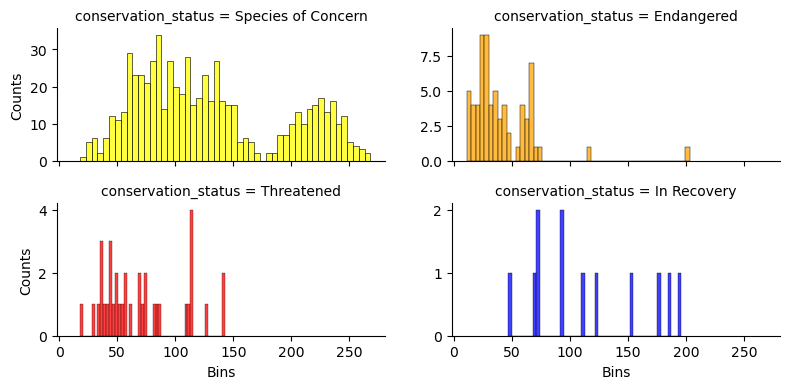

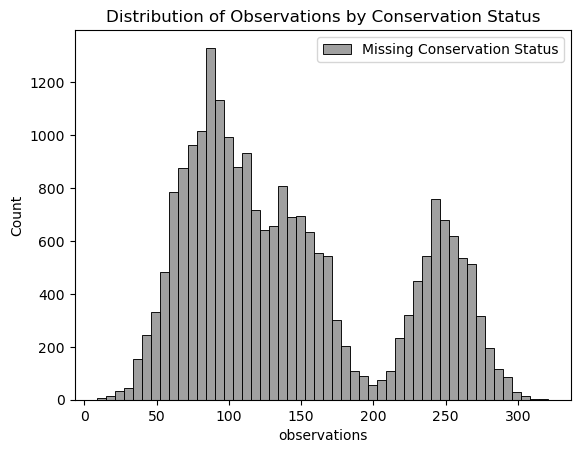

<Figure size 640x480 with 0 Axes>

In [64]:
# Relationship between conservation_status and observations

## plotting non NaN data
# # Scatterplot
# plt.tight_layout()
# sns.scatterplot(x='conservation_status', y='observations', hue='conservation_status', palette=['yellow','orange','red','blue'], data=obsp)
# #ax = plt.subplot()
# plt.title('Scatterplot of conservation status by observations')
# plt.xlabel('Conservation status')
# plt.ylabel('Observations')
# plt.show() # not very informative
# plt.clf()

# # Histogram
# plt.tight_layout()
# sns.histplot(x='observations', hue='conservation_status', palette=['yellow','orange','red','blue'], data=obsp, stat='density', bins=50)
# #ax = plt.subplot()
# plt.title('Histogram of conservation status by observations')
# #plt.xlabel('Conservation status')
# #plt.ylabel('Observations')
# plt.show() # more informative but hard to ready due to superimposition and range of scales
# plt.clf()

# FacetGrid
# Or use plt.tight_layout() before showing the plot
plt.tight_layout()
# Displaying all charts individually so that y-axis scale is optimum for each conservation_status
grid_status = sns.FacetGrid(obsp, col="conservation_status", hue="conservation_status", palette=['yellow','orange','red','blue'], col_wrap=2, height=2, aspect=2, sharey=False)
grid_status = (grid_status.map(sns.histplot, "observations", bins=50).set_axis_labels("Bins","Counts"))
plt.show() # best representation that clearly shows the distribution of each status. It is hard to link an observation threshold value to status
#plt.savefig('FacetGrid of Observations by Conservation Status.png', dpi=300, bbox_inches='tight')
plt.clf()

## plotting NaN data
# Separate the data for missing and non-missing conservation status
missing_conservation = obsp[obsp['conservation_status'].isna()]
non_missing_conservation = obsp[~obsp['conservation_status'].isna()]

# Plot histogram for observations with different colors for missing and non-missing conservation status
# use plt.tight_layout() before showing the plot
plt.tight_layout()
sns.histplot(x='observations', data=missing_conservation, bins=50, color='grey', label='Missing Conservation Status')
#sns.histplot(x='observations', data=missing_conservation, bins=50, color='orange', alpha=0.5, label='Missing Conservation Status')
#sns.histplot(x='observations', data=non_missing_conservation, bins=50, color='green', alpha=0.5, label='Non-Missing Conservation Status')
plt.legend()
plt.title('Distribution of Observations by Conservation Status')
plt.show() # this looks exactly like the "Species of Concern" distribution!
plt.clf()

Dimensions of sp_concern dataframe:  (644, 7)


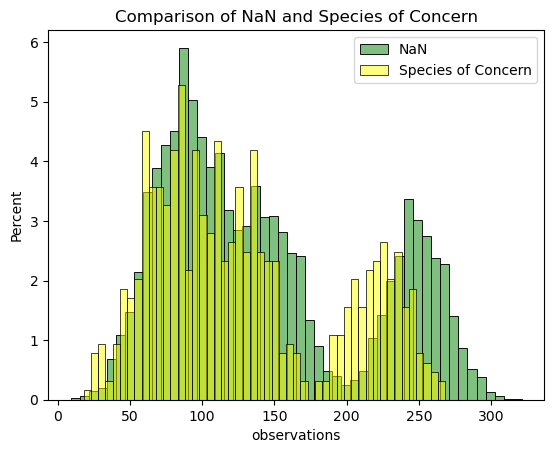

<Figure size 640x480 with 0 Axes>

In [175]:
# Isolating conservation status Species of Concern
sp_concern = obsp[obsp['conservation_status'] == 'Species of Concern']
print("Dimensions of sp_concern dataframe: ", sp_concern.shape) # (644, 7)
#display(sp_concern)

# superimposing NaN and Species of concern
plt.tight_layout()
sns.histplot(x='observations', data=missing_conservation, bins=50, color='green', alpha=0.5, label='NaN', stat='percent')
sns.histplot(x='observations', data=sp_concern, bins=50, color='yellow', alpha=0.5, label='Species of Concern', stat='percent')
plt.legend()
plt.title('Comparison of NaN and Species of Concern')
plt.savefig('Comparison of NaN and Species of Concern.png', dpi=300, bbox_inches='tight')
plt.show() # NaN distribute exactly like "Species of Concern"! 
plt.clf()

# Option 1: Can I fill NaNs in with "Species of Concern" values?
# Option 2:  Is it possible that that NaN means "not threatened"???? 

### 3.4/ Replacing NaN values  

step 3.2 showed the following:  
- 1 : missing values are not associated with US National Park
- 2 : missing values are likely associated with taxonomic categories but this doesn't help us decide how to fill in NaN  

step 3.3 showed the following:  
- 1: each known conservation status has a unique "observation" distribution
- 2: yet we cannot infer from those a "observation" threshold to decide which status to apply
- 3: NaN values and 'Species of Concern' values have the same bimodal distribution. I don't think we can substitue NaN with this status though
- 4: a more conservative and logical approach would be to consider these NaNs as stucturally mising values and consider them all as "not threatened" which could explain why no value has been attributed.  

in step 3.4, I will assign all NaN with "not threatened".

In [20]:
# Replacing 'conservation_status' NaN with "Not threatened"
obsp_no_na = obsp.copy() # copying obsp dataframe in case I make a mistake
#display(obsp_no_na)
obsp_no_na['conservation_status'].fillna('Not Threatened', inplace = True) 
#display(obsp_no_na)
#print(len(obsp_no_na[obsp_no_na['conservation_status'] == 'Not Threatened'])) # 22521 raplecment which correspond to the number of NaN
# list of conservation_status
#print(obsp_no_na.conservation_status.unique()) # ['Not Threatened' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
#print(len(obsp_no_na))

# Cross-tabulation of 'observations' counts per 'conservation_status' 
status_ct = pd.crosstab(obsp_no_na['conservation_status'], obsp['observations'].count())
print(status_ct) # 

col_0                23281
conservation_status       
Endangered              68
In Recovery             12
Not Threatened       22521
Species of Concern     644
Threatened              36


### 3.5/ Converting conservation status to numerical values 
As 'conservation_status' is an ordinal variable capturing increasing level of species vulnerability to extinction, we can convert it to increasing numbers as follows:  
- 0 : Not Threatened
- 1 : In Recovery
- 2 : Species of Concern
- 3 : Threatened
- 4 : Endangered  

In [99]:
# creating a new variable status_nb as anumerical proxy to conservation_status
obsp_no_na['status_nb'] = obsp_no_na['conservation_status'].replace({'Not Threatened':0,'In Recovery':1,'Species of Concern':2,'Threatened':3,'Endangered':4})
display(obsp_no_na)
# Cross-tabulation of 'observations' counts per 'status_nb' 
status_nb_ct = pd.crosstab(obsp_no_na['status_nb'], obsp['observations'].count())
print(status_nb_ct) # correct

,scientific_name,park_name,observations,category,common_names,conservation_status,missing_conservation_status,status_nb,common_names_length
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened,True,0,34
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Threatened,True,0,13
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not Threatened,True,0,12
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not Threatened,True,0,10
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not Threatened,True,0,14
...,...,...,...,...,...,...,...,...,...
23276,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Not Threatened,True,0,11
23277,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Not Threatened,True,0,26
23278,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Not Threatened,True,0,31
23279,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Not Threatened,True,0,15


col_0      23281
status_nb       
0          22521
1             12
2            644
3             36
4             68


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

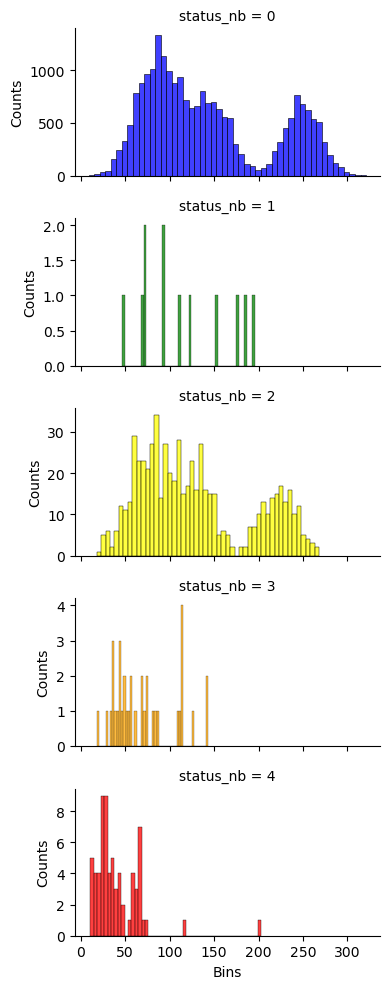

<Figure size 640x480 with 0 Axes>

In [177]:
# FacetGrid
# use plt.tight_layout() before showing the plot
plt.tight_layout()
# Displaying all charts individually so that y-axis scale is optimum for each conservation_status
grid_status = sns.FacetGrid(obsp_no_na, col="status_nb", hue="status_nb", palette=['blue','green','yellow','orange','red'], col_wrap=1, height=2, aspect=2, sharey=False)
grid_status = (grid_status.map(sns.histplot, "observations", bins=50).set_axis_labels("Bins","Counts"))
plt.savefig('Observations by Conservation Status.png', dpi=300, bbox_inches='tight')
plt.show() # best representation that clearly shows the distribution of each status. It is hard to link an observation threshold value to status
plt.clf()

### 3.6/ Assessing Common names in sp dataframe 
I'll then tackle the 'common_names' variable and assess how many of them need updating

count    23281.000000
mean        25.302951
std         16.203371
min          3.000000
25%         15.000000
50%         20.000000
75%         32.000000
max        218.000000
Name: common_names_length, dtype: float64


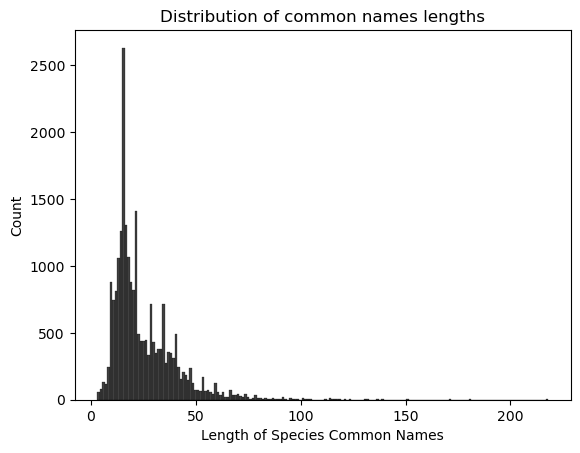

<Figure size 640x480 with 0 Axes>

In [179]:
# Calculate the length of each string in the 'common_names' column
obsp_no_na['common_names_length'] = obsp_no_na['common_names'].apply(len)

# Get the summary statistics of the lengths
length_stats = obsp_no_na['common_names_length'].describe()
print(length_stats) # common_names range 3-218 characters, with a mean of 25, and 3/4 values < 32 

# visualisation of common_names using histogram
sns.histplot(data=obsp_no_na, x='common_names_length', color='black')
plt.title('Distribution of common names lengths')
plt.xlabel('Length of Species Common Names')
plt.savefig('Distribution of common names lengths.png', dpi=300, bbox_inches='tight')
plt.show() # very few instances of long names so I'm not going to worry about it
plt.clf()


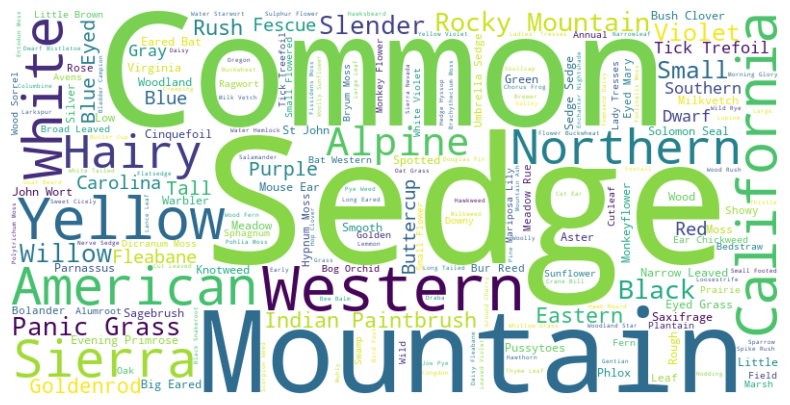

,scientific_name,park_name,observations,category,common_names,conservation_status,missing_conservation_status,status_nb,common_names_length,last_common_name
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Threatened,True,0,34,Vetch
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Threatened,True,0,13,Mink
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not Threatened,True,0,12,Plum
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not Threatened,True,0,10,Velvetleaf
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not Threatened,True,0,14,Bluecup


<Figure size 640x480 with 0 Axes>

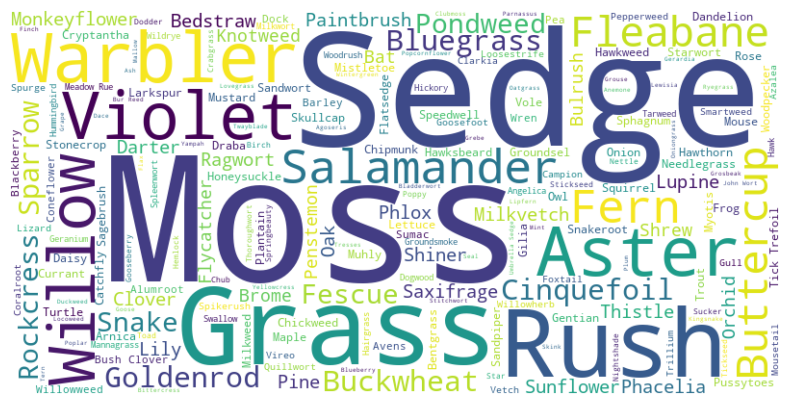

<Figure size 640x480 with 0 Axes>

In [181]:
# Presenting the common names as word clouds
text1 = ' '.join(obsp_no_na['common_names'])  # Convert the list of species names into a single string
# Plotting the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.clf()

# Create a new column 'last_common_name' by extracting the last word from 'common_names'
obsp_no_na['last_common_name'] = obsp_no_na['common_names'].str.split().str[-1]
# Display the updated DataFrame
display(obsp_no_na.head())
# exporting final dataframe to csv file
obsp_no_na.to_csv('obsp_no_na.csv', index=False)

# Presenting the last common names as word clouds
text2 = ' '.join(obsp_no_na['last_common_name'])  # Convert the list of species relevant descriptor into a single string
# Plotting the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Wordcloud last common name.png', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()


## 4/ Data Analysis
Now that the data is clean, we can investigate the following questions:  
- which parks maintain biodiversity? stats on number of species (in total, per park).
- is there a link between conservation status and taxonomical categories?  stats on number of categories (in total, per park), number of species/category.
- can we infer conservation status from observations (are they associated)?
- is there a bias (some species or park whose data are less captured)?  
- which endangered species need to be protected in which park?  

### 4.1/ Park's biodiversity

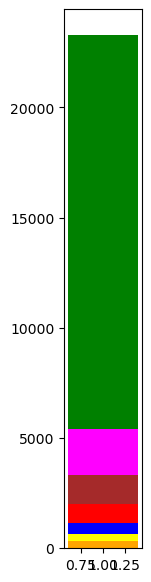

In [204]:
# overall biodiversity at the category level
# visualisation using stacked bar charts
plt.figure(figsize=(1, 7))
cat = obsp_no_na.groupby('category').size()
cat = cat.sort_values(ascending=True)

# Define a dictionary mapping categories to specific colors
category_colors = {
    'Vascular Plant': 'green',
    'Mammal': 'red',
    'Bird': 'magenta',
    'Nonvascular Plant': 'brown',
    'Amphibian': 'yellow',
    'Reptile': 'orange',
    'Fish': 'blue',
}

# Create a bar plot with stacked bars
bottom = 0
for category in cat.index:
    plt.bar(1, cat[category], bottom=bottom, color=category_colors.get(category, 'grey'), label=category)
    bottom += cat[category]

#plt.legend()
plt.savefig('Bar chart of Categories across all data.png', dpi=300, bbox_inches='tight')
plt.show()


park_name                            category         
Bryce National Park                  Amphibian               7380
                                     Bird                   51647
                                     Fish                   12423
                                     Mammal                 20550
                                     Nonvascular Plant      32992
                                     Reptile                 7950
                                     Vascular Plant        442959
Great Smoky Mountains National Park  Amphibian               5707
                                     Bird                   37728
                                     Fish                    9206
                                     Mammal                 15012
                                     Nonvascular Plant      24857
                                     Reptile                 5691
                                     Vascular Plant        333177
Yellowstone National 

<Figure size 1400x1400 with 0 Axes>

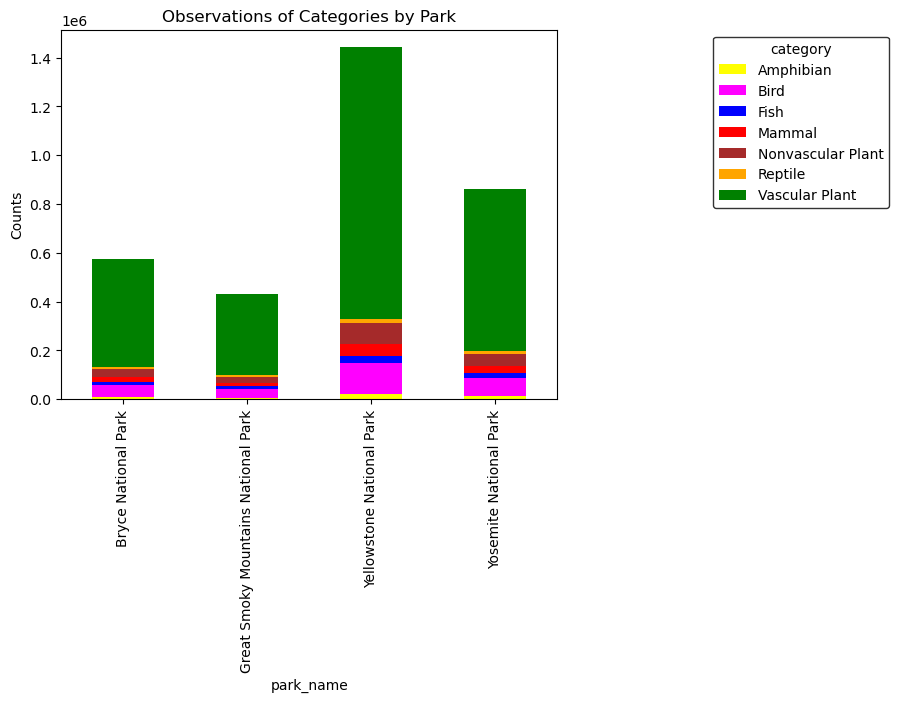

In [224]:
# # column names
# print(obsp_no_na.columns) 
# # ['scientific_name','park_name','observations','category','common_names','conservation_status','missing_conservation_status','status_nb','common_names_length'

# # park names
# print(obsp_no_na['park_name'].unique())
# # ['Great Smoky Mountains National Park','Yosemite National Park','Bryce National Park','Yellowstone National Park']

# # category names
# print(obsp_no_na['category'].unique())
# ['Vascular Plant','Mammal','Bird','Nonvascular Plant','Amphibian','Reptile','Fish']

# # number of species per park
# obsp_no_na.groupby('park_name')['scientific_name'].value_counts() # too many species, let's look at the categories instead

# number of taxons per park
#park_cat = obsp_no_na.groupby('park_name')['category'].value_counts() # very similar numbers across parks
park_cat = obsp_no_na.groupby(['park_name', 'category'])['observations'].sum()
print(park_cat)

# visualisation using stacked bar charts
plt.figure(figsize=(14, 14))
grouped_data = obsp_no_na.groupby(['park_name', 'category'])['observations'].sum().unstack(fill_value=0)
grouped_data = grouped_data.apply(lambda x: x.sort_values(ascending=True), axis=1)  # Sort values along the columns

# Define a dictionary mapping categories to specific colors
category_colors = {
    'Vascular Plant': 'green',
    'Mammal': 'red',
    'Bird': 'magenta',
    'Nonvascular Plant': 'brown',
    'Amphibian': 'yellow',
    'Reptile': 'orange',
    'Fish': 'blue',
}

# Create a list of colors based on the categories
colors = [category_colors.get(category, 'grey') for category in grouped_data.columns]
# Create a staked bar plot
grouped_data.plot(kind='bar', stacked=True, color=colors)
ax = plt.gca()
#sns.set(font_scale = 1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.3, 1), edgecolor='black')
plt.ylabel('Counts')
plt.title('Observations of Categories by Park')
plt.savefig('Bar chart of Categories by Park.png', dpi=300, bbox_inches='tight')
plt.show() # exactely the same proportion of categories across parks! Uncanny! Fictional data indeed!


#### Conclusions  
Parks feature different category distributions. As far as biodiveristy is concerned, they rank as follows: Yellostone NP> Yosemite NP > Bryce NP > Great Smoky Mountains NP.

### 4.2/ Are some taxonomical categories faring better than others?   
Is there a link between conservation status and taxonomical categories?   
stats on number of categories (in total, per park), number of species/category.  
I'll use the numerical codes 'status_nb' which allows for easy sorting.

status_nb  category         
0          Amphibian              41219
           Bird                  253970
           Fish                   67422
           Mammal                 99991
           Nonvascular Plant     187948
           Reptile                42142
           Vascular Plant       2530442
1          Bird                    1392
2          Amphibian               2044
           Bird                   36642
           Fish                    2109
           Mammal                 14408
           Nonvascular Plant       2705
           Reptile                 2536
           Vascular Plant         22135
3          Amphibian                564
           Fish                     832
           Mammal                   578
           Vascular Plant           552
4          Amphibian                144
           Bird                     574
           Fish                     455
           Mammal                  1463
           Vascular Plant           162
Name: obser

<Figure size 1400x1400 with 0 Axes>

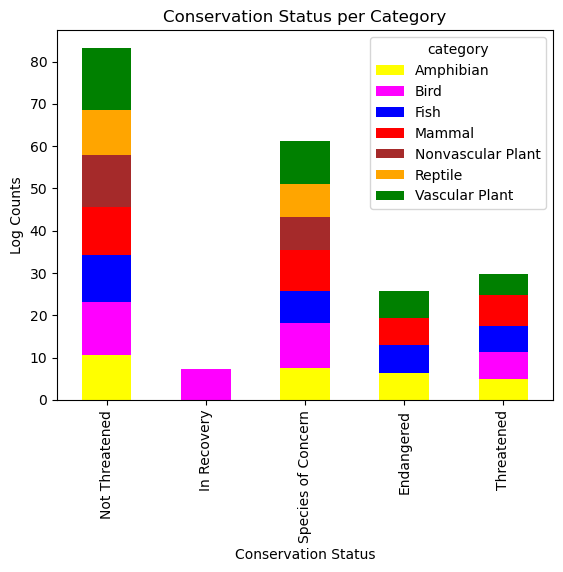

In [222]:
# number of taxons per status_nb
status_cat = obsp_no_na.groupby(['status_nb','category'])['observations'].sum() # 
print(status_cat)

# visualisation using stacked bar charts
plt.figure(figsize=(14, 14))
grouped_data2 = obsp_no_na.groupby(['status_nb', 'category'])['observations'].sum().unstack(fill_value=0)
grouped_data2 = grouped_data2.apply(lambda x: x.sort_values(ascending=True), axis=1)  # Sort values along the columns
# transformation for comparison purpose
grouped_data2_log = np.log(grouped_data2 + 1)  # Apply log transformation, adding 1 to avoid log(0)

# Define a dictionary mapping categories to specific colors
category_colors = {
    'Vascular Plant': 'green',
    'Mammal': 'red',
    'Bird': 'magenta',
    'Nonvascular Plant': 'brown',
    'Amphibian': 'yellow',
    'Reptile': 'orange',
    'Fish': 'blue',
}

# Create a list of colors based on the categories
colors = [category_colors.get(category, 'grey') for category in grouped_data2.columns]
# Create a staked bar plot
ax = grouped_data2_log.plot(kind='bar', stacked=True, color=colors)
# Set 'status_nb' as the index and then plot with sub-labels
plt.xlabel('Conservation Status')

# Set the x-axis tick labels to display 'conservation_status'
ax.set_xticks(range(len(grouped_data2_log.index)))  # Set the x-axis tick positions
ax.set_xticklabels(['Not Threatened', 'In Recovery', 'Species of Concern', 'Endangered', 'Threatened'])  # Set the x-axis tick labels
plt.title('Conservation Status per Category')
plt.ylabel('Log Counts')
plt.savefig('Conservation Status per Category.png', dpi=300, bbox_inches='tight')
plt.show() 


Dimension of in_recovery dataframe:  (12, 10)
['American Peregrine Falcon' 'Bald Eagle' 'Brown Pelican']
count     12.000000
mean     116.000000
std       50.630569
min       47.000000
25%       72.000000
50%      103.000000
75%      158.000000
max      196.000000
Name: observations, dtype: float64


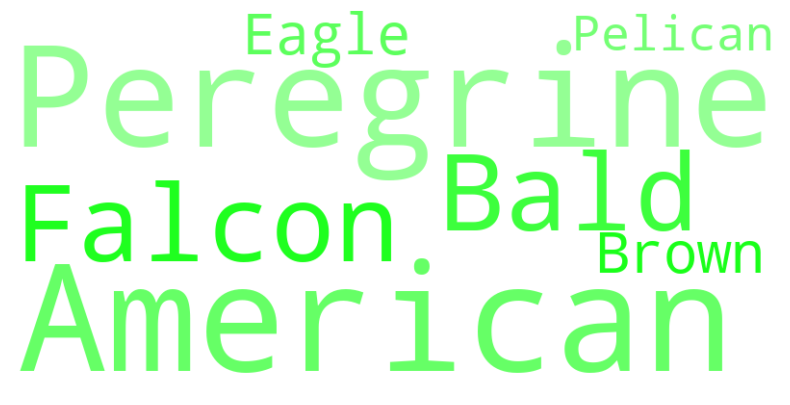

In [191]:
# which species are in recovery?
in_recovery = obsp_no_na[obsp_no_na['conservation_status'] == 'In Recovery']
print('Dimension of in_recovery dataframe: ', in_recovery.shape) # (12, 9)
#display(in_recovery)
print(in_recovery['common_names'].unique()) # ['American Peregrine Falcon','Bald Eagle','Brown Pelican']
print(in_recovery['observations'].describe())

# Presenting the last common names as word clouds
text4 = ' '.join(in_recovery['common_names'])  # Convert the list of endangered species relevant descriptor into a single string

# Define a custom color function that generates red colors
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(120, 100%, {}%)".format(np.random.randint(50, 100))   # Use HSL color format with varying lightness

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=green_color_func).generate(text4)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Wordcloud of recovering species.png', dpi=300, bbox_inches='tight')
plt.show()


In [137]:
# which species are endangered?
endangered = obsp_no_na[obsp_no_na['conservation_status'] == 'Endangered']
print('Dimension of endangered dataframe: ', endangered.shape) # (68, 9)
#display(endangered)
# which mammals are endangered?
endangered_mammals = endangered[endangered['category'] == 'Mammal']
print(endangered_mammals['common_names'].unique()) 
# ['Red Wolf','Gray Wolf','Gray Myotis','Sierra Nevada Bighorn Sheep','Carolina Northern Flying Squirrel,Northern Flying Squirrel','Indiana Bat, Indiana Or Social Myotis']
print(endangered_mammals['observations'].describe())
#display(endangered_mammals)

Dimension of endangered dataframe:  (68, 10)
['Red Wolf' 'Gray Wolf' 'Gray Myotis' 'Sierra Nevada Bighorn Sheep'
 'Carolina Northern Flying Squirrel, Northern Flying Squirrel'
 'Indiana Bat, Indiana Or Social Myotis']
count     32.000000
mean      45.718750
std       36.823235
min       13.000000
25%       26.750000
50%       34.500000
75%       61.750000
max      203.000000
Name: observations, dtype: float64


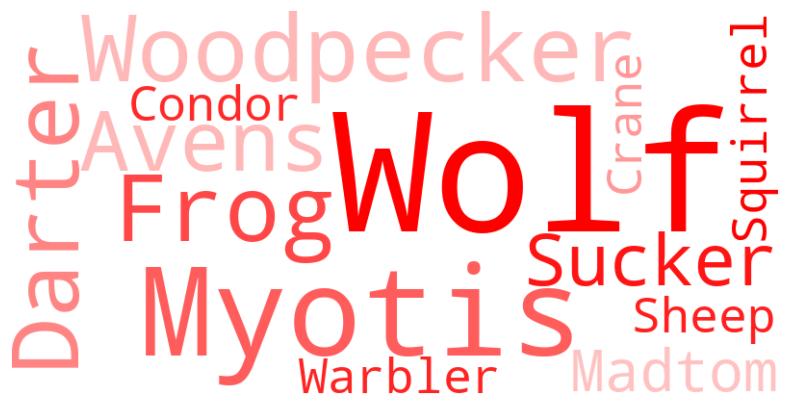

In [193]:
# Presenting the last common names as word clouds
text3 = ' '.join(endangered['last_common_name'])  # Convert the list of endangered species relevant descriptor into a single string

# Define a custom color function that generates red colors
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 100%, {}%)".format(np.random.randint(50, 100))  # Use HSL color format with varying lightness

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=red_color_func).generate(text3)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Wordcloud of critically endangered species.png', dpi=300, bbox_inches='tight')
plt.show()

#### Conclusion  
Unthreatened species (status_nb = 01) are equally represented across all taxomomical categories.  
Only birds are in recovery (status_nb = 1), across all parks (12 entries) with 47-196 sightings.   
Those birds are the 'American Peregrine Falcon', the 'Bald Eagle', and the 'Brown Pelican'.  
All taxons feature Species of Concern (status_nb = 2).  
Threatened species (status_nb = 3) belong to Amphibians, Fish, Mammal and Vascular Plant.  
Endangered species (status_nb = 4) belong to Amphibians, Birds, Fish, Mammal and Vascular Plant.  
Mammals are the most numerous (13-203 sightings), featuring wolves, squirrels, bats and mountain sheep.  


### 4.3/ Relationship between parks, conservation status and observations
Can we infer conservation status from observations (are they associated)?

In [36]:
# Create a formula for the ANOVA test
#formula = 'observations ~ C(park_name) + C(category) + C(status_nb)'
formula = 'observations ~ C(park_name) * C(category) * C(status_nb)'

# Fit the ANOVA model
model = ols(formula, data=obsp_no_na).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table) # park_name and status_nb and their interaction are significantly impacting observations but not category or any other interactions.


                                             sum_sq       df             F         PR(>F)
C(park_name)                           1.006123e+08      3.0  82965.604997   0.000000e+00
C(category)                            1.445125e+03      6.0      0.595830   6.176677e-01
C(status_nb)                           4.834394e+05      4.0    298.985622  1.870673e-190
C(park_name):C(category)               2.353721e+03     18.0      0.323483   8.084021e-01
C(park_name):C(status_nb)              4.151782e+04     12.0      8.558972   2.576486e-09
C(category):C(status_nb)               1.501543e+04     24.0      1.547729   7.976516e-02
C(park_name):C(category):C(status_nb)  2.410222e+04     72.0      0.828119   7.774266e-01
Residual                               9.372141e+06  23185.0           NaN            NaN


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 3
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 6
  warnings.warn('covariance of constraints does not have full 

The ANOVA table provides information about the significance of the main effects and interaction effects in explaining the variation in the numerical variable 'observations'.   
Interpretation of results:  

1. **C(park_name)**:
   - The sum of squares (sum_sq) for 'park_name' is 1.006123e+08.
   - The degrees of freedom (df) is 3.
   - The F-statistic (F) is 82965.604997.
   - The p-value (PR(>F)) is 0.000000e+00, which is less than the typical significance level of 0.05. This indicates that 'park_name' has a significant effect on 'observations'.

2. **C(category)**:
   - The sum of squares (sum_sq) for 'category' is 1.445125e+03.
   - The degrees of freedom (df) is 6.
   - The F-statistic (F) is 0.595830.
   - The p-value (PR(>F)) is 6.176677e-01, which is greater than 0.05. This indicates that 'category' does not have a significant effect on 'observations'.

3. **C(status_nb)**:
   - The sum of squares (sum_sq) for 'status_nb' is 4.834394e+05.
   - The degrees of freedom (df) is 4.
   - The F-statistic (F) is 298.985622.
   - The p-value (PR(>F)) is 1.870673e-190, which is much less than 0.05. This indicates that 'status_nb' has a significant effect on 'observations'.

4. **Interaction Effects**:
   - The interaction effects (e.g., C(park_name):C(category)) also have corresponding sum of squares, degrees of freedom, F-statistic, and p-values. These indicate the significance of the interaction effects on 'observations'.
   - Only C(park_name):C(status_nb) interaction with a p-value of 2.576486e-09 has a significant effect on 'observations'.

5. **Residual**:
   - The residual sum of squares and degrees of freedom represent the unexplained variation in 'observations' after accounting for the effects of the variables in the model.

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
               group1                              group2               meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------------------
                Bryce National Park Great Smoky Mountains National Park -24.7557   0.0  -25.7748 -23.7366   True
                Bryce National Park           Yellowstone National Park 148.9618   0.0  147.9427 149.9808   True
                Bryce National Park              Yosemite National Park  49.3271   0.0   48.3081   50.346   True
Great Smoky Mountains National Park           Yellowstone National Park 173.7175   0.0  172.6982 174.7367   True
Great Smoky Mountains National Park              Yosemite National Park  74.0827   0.0   73.0636  75.1019   True
          Yellowstone National Park              Yosemite National Park -99.6347   0.0 -100.6538

C:\Users\Owner\AppData\Local\Temp\ipykernel_12112\3088572522.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  interaction_plot = sns.pointplot(x='park_name', y='observations', hue='status_nb', data=obsp_no_na, ci=None)


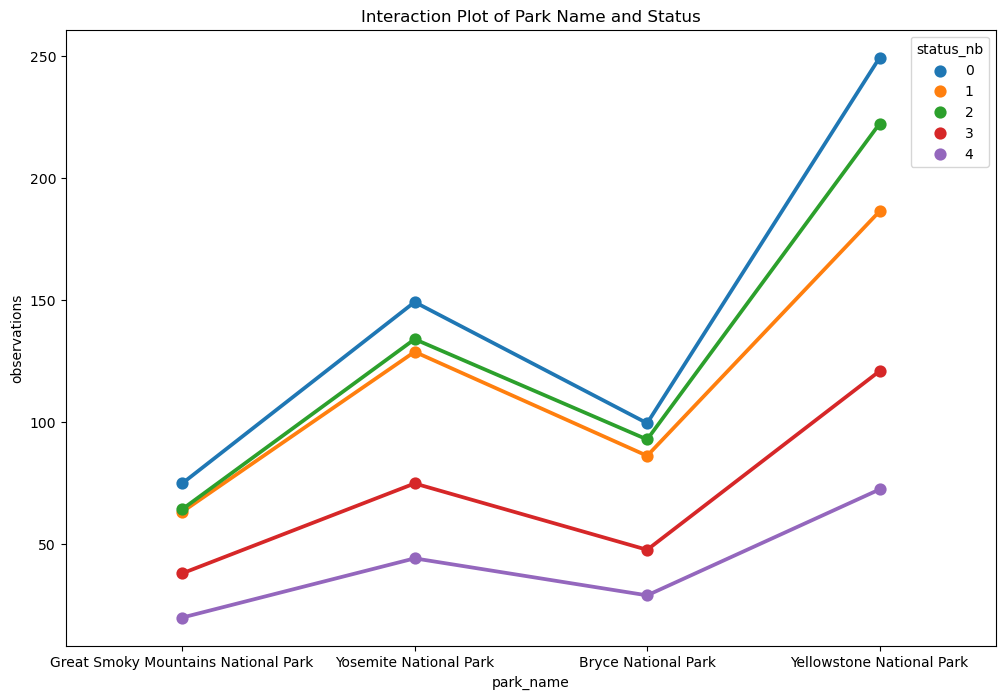

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for 'park_name'
tukey = pairwise_tukeyhsd(endog=obsp_no_na['observations'], groups=obsp_no_na['park_name'])
print(tukey.summary())

# Create a point plot to visualize the interaction effect
plt.figure(figsize=(12, 8))
interaction_plot = sns.pointplot(x='park_name', y='observations', hue='status_nb', data=obsp_no_na, ci=None)
interaction_plot.set_title('Interaction Plot of Park Name and Status')
plt.show()

#### Conclusion  
Observation values are associated with the different parks and status but not taxons.

### 4.4/ which endangered species need to be protected in which park?  

,scientific_name,park_name,observations,category,common_names,conservation_status,missing_conservation_status,status_nb,common_names_length
3,Picoides borealis,Bryce National Park,24,Bird,Red-Cockaded Woodpecker,Endangered,False,4,23
14,Etheostoma percnurum,Bryce National Park,25,Fish,Duskytail Darter,Endangered,False,4,16
16,Myotis grisescens,Bryce National Park,27,Mammal,Gray Myotis,Endangered,False,4,11
8,Canis rufus,Bryce National Park,30,Mammal,Red Wolf,Endangered,False,4,8
6,Rana sierrae,Bryce National Park,31,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered,False,4,32
7,Rana sierrae,Great Smoky Mountains National Park,11,Amphibian,Sierra Nevada Yellow-Legged Frog,Endangered,False,4,32
10,Canis rufus,Great Smoky Mountains National Park,13,Mammal,Red Wolf,Endangered,False,4,8
1,Picoides borealis,Great Smoky Mountains National Park,15,Bird,Red-Cockaded Woodpecker,Endangered,False,4,23
19,Myotis grisescens,Great Smoky Mountains National Park,26,Mammal,Gray Myotis,Endangered,False,4,11
13,Etheostoma percnurum,Great Smoky Mountains National Park,31,Fish,Duskytail Darter,Endangered,False,4,16


Common scientific names across park names:
Series([], Name: park_name, dtype: object)

Scientific names differing across park names:
scientific_name
Canis rufus             {Great Smoky Mountains National Park, Yellowst...
Etheostoma percnurum    {Great Smoky Mountains National Park, Yellowst...
Myotis grisescens       {Great Smoky Mountains National Park, Yellowst...
Picoides borealis       {Great Smoky Mountains National Park, Yellowst...
Rana sierrae            {Great Smoky Mountains National Park, Yellowst...
Name: park_name, dtype: object


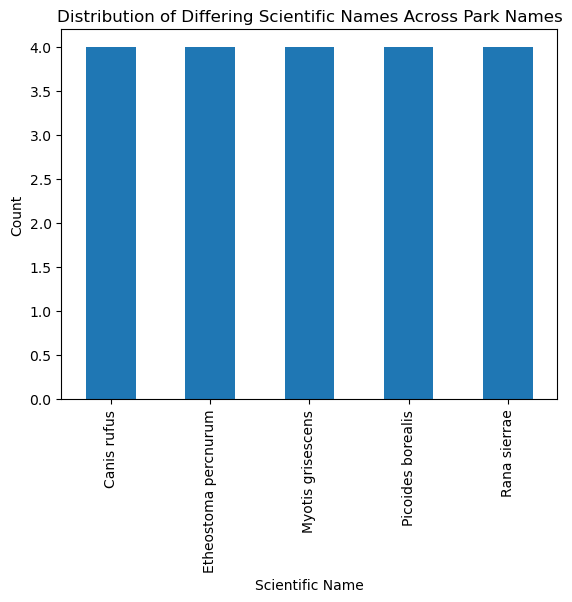

In [40]:
# Count the occurrences of each unique value in the 'scientific_name' column
sta4_sp_counts = obsp_no_na[obsp_no_na['status_nb'] == 4]['scientific_name'].value_counts()

# Select the 5 least frequent scientific names among endangered species
least_frequent_scientific_names = sta4_sp_counts.nsmallest(5)

# Create a DataFrame with the 50 least frequent scientific names
least_frequent_df = pd.DataFrame({'scientific_name': least_frequent_scientific_names.index})

# Merge the least frequent scientific names back to the original DataFrame
merged_df = obsp_no_na.merge(least_frequent_df, on='scientific_name')

# Sort the merged DataFrame by 'park_name'
sorted_least_frequent_df = merged_df.sort_values(by=['park_name','observations'])

# Display the sorted DataFrame
display(sorted_least_frequent_df)

# highlighting critically endangered species common or differing across parks
common_names = sorted_least_frequent_df.groupby('scientific_name')['park_name'].apply(set)
differing_names = common_names[common_names.apply(len) > 1]
common_names = common_names[common_names.apply(len) == 1]

print("Common scientific names across park names:")
print(common_names)

print("\nScientific names differing across park names:")
print(differing_names)

# Plot differing scientific names
differing_names.apply(len).plot(kind='bar')
plt.title('Distribution of Differing Scientific Names Across Park Names')
plt.xlabel('Scientific Name')
plt.ylabel('Count')
plt.show()

#### Conclusion  
The 5 most critically endangered species were common across all parks, they should be part of national program to protect them.  
They are:  
- Canis rufus 
- Rana sierrae 
- Myotis grisescens 
- Picoides borealis  
- Etheostoma percnurum


### 4.5/ Potential biases
We coul not detect any potential biases.

## 5/ General conclusions
The datasets provided were merged, duplicates were removed and missing values were replaced by a Not Threatened label.  
Data analysis and visualisation showed that:  
- Parks feature different category distributions. As far as biodiversity is concerned, they rank as follows: Yellostone NP> Yosemite NP > Bryce NP > Great Smoky Mountains NP. 
- Observation values are associated with the different parks and status but not taxonomic categories  
- Only 'American Peregrine Falcon', the 'Bald Eagle', and the 'Brown Pelican' birds are in recovery  
- Amphibians, Birds, Fish, Vascular Plant and Mammal in particular feature Endangered species.  
- Mammals are the most numerous, featuring wolves, squirrels, bats and mountain sheep.  
- The 5 most critically endangered species are:
  - Canis rufus
  - Rana sierrae
  - Myotis grisescens
  - Picoides borealis
  - Etheostoma percnurum

## 6/ Future endeavours  
More data should be acquired across more US National Parks and the analysis reproduced.
Federal and state governments should be given a list of the most critically endangered species so that they can put in place protective measures. 